### Objective

- To predict whether a liability customer will buy a loan or not.
- Which variables are most significant for making predictions.
- Which segment of customers should be targeted more.

In [552]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from numpy import percentile

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [553]:
Bank = pd.read_csv("My_Bank.csv")

<IPython.core.display.Javascript object>

In [554]:
# copying data to avoid changes to original data
data = Bank.copy()

<IPython.core.display.Javascript object>

In [555]:
data.head(10)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75000,SELF-EMP,776,30,SA,3/23/2005,146,7,0,1,2,0,0,0,13100,0,0,973557.00000,0,0,1,1
1,C6877,0,47,M,287489.04000,SAL,324,28,SA,10-11-2008,104,8,0,1,1,0,0,0,6600,0,0,799813.00000,0,1,1,0
2,C19922,0,40,M,18216.88000,SELF-EMP,603,2,SA,4/26/2012,61,10,1,1,1,0,2,0,11200,561120,49320,997570.00000,0,1,1,1
3,C8183,0,53,M,71720.48000,SAL,196,13,CA,07-04-2008,107,36,4,2,3,1,4,0,26100,673590,60780,741506.00000,71388,0,1,0
4,C12123,0,36,M,1671622.89000,PROF,167,24,SA,12/29/2001,185,20,1,0,0,0,0,0,0,808480,0,0.00000,0,0,1,0
5,C257,0,42,F,521685.69000,PROF,493,26,SA,06-07-2001,192,5,1,1,0,0,0,1,18500,379310,0,0.00000,0,0,1,1
6,C8300,0,30,M,204458.60000,PROF,479,14,SA,8/25/2002,177,6,0,1,1,0,4,0,6200,0,10580,770065.00000,0,1,0,1
7,C5999,0,53,F,58516.34000,SAL,562,25,CA,3/15/2009,99,14,3,0,0,0,0,0,0,945160,0,0.00000,0,0,1,1
8,C5692,0,42,F,13158.14000,SELF-EMP,105,15,SA,02-08-2010,88,18,6,2,4,1,1,1,35400,198430,51490,326421.00000,170332,0,1,1
9,C3241,0,30,M,831150.18000,PROF,170,13,SA,03-02-2008,111,14,3,1,0,0,4,0,18000,869880,32610,0.00000,0,0,0,0


<IPython.core.display.Javascript object>

In [556]:
data.tail()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
19995,C4520,0,41,F,181029.01000,SENP,598,15,SA,09-04-2003,165,4,1,0,0,0,2,0,0,277050,59460,0.00000,0,0,1,1
19996,C10147,0,37,F,46624.98000,SELF-EMP,299,11,SA,05-03-2013,49,17,4,2,3,1,4,0,17200,705740,24300,902772.00000,46829,0,1,0
19997,C2392,0,30,M,142433.53000,PROF,722,11,SA,11-01-2007,115,20,8,2,0,1,5,0,33400,83740,62210,0.00000,132010,0,1,0
19998,C14659,0,46,M,394654.75000,SAL,234,4,SA,8/22/2006,129,11,1,1,0,0,4,1,7700,195790,43550,0.00000,0,0,1,0
19999,C12911,1,41,M,7152.60000,SELF-EMP,561,12,SA,6/21/2014,35,10,1,1,0,0,4,1,15100,276520,61510,0.00000,0,0,1,0


<IPython.core.display.Javascript object>

In [557]:
data.shape

(20000, 26)

<IPython.core.display.Javascript object>

This dataset has 20000 rows and 26 columns

In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   SCR                       20000 non-null  int64  
 7   HOLDING_PERIOD            20000 non-null  int64  
 8   ACC_TYPE                  20000 non-null  object 
 9   ACC_OP_DATE               20000 non-null  object 
 10  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 11  NO_OF_L_CR_TXNS           20000 non-null  int64  
 12  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64  
 13  NO_OF_ATM_DR_TXNS         20000 non-null  int64  
 14  NO_OF_

<IPython.core.display.Javascript object>

In [559]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "FLG_HAS_CC",
    "TARGET",
    "ACC_TYPE",
    "OCCUPATION",
    "GENDER",
    "FLG_HAS_NOMINEE",
    "FLG_HAS_OLD_LOAN",
    "FLG_HAS_ANY_CHGS",
]
data[cat_cols] = data[cat_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CUST_ID                   20000 non-null  object  
 1   TARGET                    20000 non-null  category
 2   AGE                       20000 non-null  int64   
 3   GENDER                    20000 non-null  category
 4   BALANCE                   20000 non-null  float64 
 5   OCCUPATION                20000 non-null  category
 6   SCR                       20000 non-null  int64   
 7   HOLDING_PERIOD            20000 non-null  int64   
 8   ACC_TYPE                  20000 non-null  category
 9   ACC_OP_DATE               20000 non-null  object  
 10  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64   
 11  NO_OF_L_CR_TXNS           20000 non-null  int64   
 12  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64   
 13  NO_OF_ATM_DR_TXNS         20000 non-null  int6

<IPython.core.display.Javascript object>

In [560]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,20000.00000,38.41815,9.57798,21.00000,30.00000,38.00000,46.00000,55.00000
BALANCE,20000.00000,511362.19212,723592.96179,0.00000,64754.02500,231675.84500,653876.85000,8360430.57000
SCR,20000.00000,440.15030,249.88758,100.00000,227.00000,364.00000,644.00000,999.00000
HOLDING_PERIOD,20000.00000,14.95565,8.64263,1.00000,7.00000,15.00000,22.00000,31.00000
LEN_OF_RLTN_IN_MNTH,20000.00000,125.23930,54.95394,29.00000,79.00000,125.00000,172.00000,221.00000
NO_OF_L_CR_TXNS,20000.00000,12.34805,12.15192,0.00000,6.00000,10.00000,14.00000,75.00000
NO_OF_BR_CSH_WDL_DR_TXNS,20000.00000,1.88300,2.26360,0.00000,1.00000,1.00000,2.00000,15.00000
NO_OF_ATM_DR_TXNS,20000.00000,1.02895,1.49724,0.00000,0.00000,1.00000,1.00000,25.00000
NO_OF_NET_DR_TXNS,20000.00000,1.17245,2.40425,0.00000,0.00000,0.00000,1.00000,22.00000
NO_OF_MOB_DR_TXNS,20000.00000,0.41175,2.00985,0.00000,0.00000,0.00000,0.00000,25.00000


<IPython.core.display.Javascript object>


- Age: Average age of customer is about 38 years old as is the median, it is normally distributed.
- Balance: The Monthly average balance is averaged to be about 511k but the median is 231k, this is right skewed.
- SCR: Average marketing score is about 440 while median is 364 with a wide range from 100-999.
- Holding Period: Average holding period is about 15 months
- Length of Relationship in Months: Avg length of relationship is about 125 months with similar median indicating a normal distribution
- Number of Credit Transactions: The avg number of credit transactions is about 12. With 75% being 14 and max being 75, there may be outliers present.
- Branch Cash Withdrawal Debit Transactions: Most transactions avg to be around 2 but range up to 15 so there may be outliers and extreme values
- Number of ATM Debit Transactions: Outliers/Extreme values present due to most values being around 0-1 but max being 25
- Number of Net Banking Debit Transactions:  Most common values around 1 but max number indiciates it may have an outlier
- Number of Mobile Banking Debit Transactions: Most common values around 0 but max number indiciates it may have an outlier
- Number of Cheque Debit Transactions: Most values are around 2 with a max of 15, may have some extreme values
- Amount Withdrawn from ATM: The amount withdrawn from ATM ranges around 6-10k but goes up to about 200k, indicating a skew and/or outliers
- Amount cash withdrawn from Branch: There is a very wide range from 2k to 999k indicating various amounts of withdrawals and/or outliers.
- Amount debited by Cheque Transactions: Avg amount debited was about 124k while median is only about 24k. This is likely due to the max amount being upwards of 4 Million dollars.
- Amount debited by Net Transactions: Many customers don't seem to use debit by net transactions but max value is roughly 999k indicating outliers
- Amount debited by Mobile Transactions: Most customers don't seem to use debit by mobile transaction, outliers probable

In [561]:
data = data.drop(["CUST_ID"], axis=1)

<IPython.core.display.Javascript object>

Customer ID will not provide useful information for our analysis. 

In [562]:
data.describe(include=["category"]).T

,count,unique,top,freq
TARGET,20000,2,0,17488
GENDER,20000,3,M,14376
OCCUPATION,20000,4,SAL,5855
ACC_TYPE,20000,2,SA,15759
FLG_HAS_CC,20000,2,0,13892
FLG_HAS_ANY_CHGS,20000,2,0,17788
FLG_HAS_NOMINEE,20000,2,1,18023
FLG_HAS_OLD_LOAN,20000,2,0,10141


<IPython.core.display.Javascript object>

In [563]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in FLG_HAS_CC are :
0    13892
1     6108
Name: FLG_HAS_CC, dtype: int64
**************************************************
Unique values in TARGET are :
0    17488
1     2512
Name: TARGET, dtype: int64
**************************************************
Unique values in ACC_TYPE are :
SA    15759
CA     4241
Name: ACC_TYPE, dtype: int64
**************************************************
Unique values in OCCUPATION are :
SAL         5855
PROF        5417
SENP        5160
SELF-EMP    3568
Name: OCCUPATION, dtype: int64
**************************************************
Unique values in GENDER are :
M    14376
F     5433
O      191
Name: GENDER, dtype: int64
**************************************************
Unique values in FLG_HAS_NOMINEE are :
1    18023
0     1977
Name: FLG_HAS_NOMINEE, dtype: int64
**************************************************
Unique values in FLG_HAS_OLD_LOAN are :
0    10141
1     9859
Name: FLG_HAS_OLD_LOAN, dtype: int64
************************

<IPython.core.display.Javascript object>

- Most people did were not responders to the loan campaign
- Most accounts are savings accounts
- Most people do not seem to have a credit card
- About equal amounts of Sal, Prof, and SENP occupations with self-emp coming in last.
- Most people people do have a nominee
- Roughly equal amounts of people have taken out loans and not taken out loans
- Most people do not have any banking charges

In [564]:
data = data.drop(["ACC_OP_DATE"], axis=1)

<IPython.core.display.Javascript object>

## EDA 

### Univariate Analysis

In [565]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

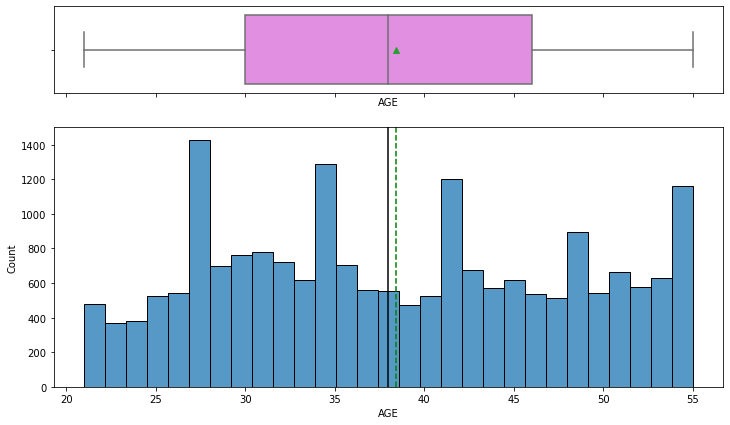

<IPython.core.display.Javascript object>

In [566]:
histogram_boxplot(data, "AGE")

- The distribution for age is pretty symmetrical around the mean and median
- Mean & Median age of customers is about 37 years old

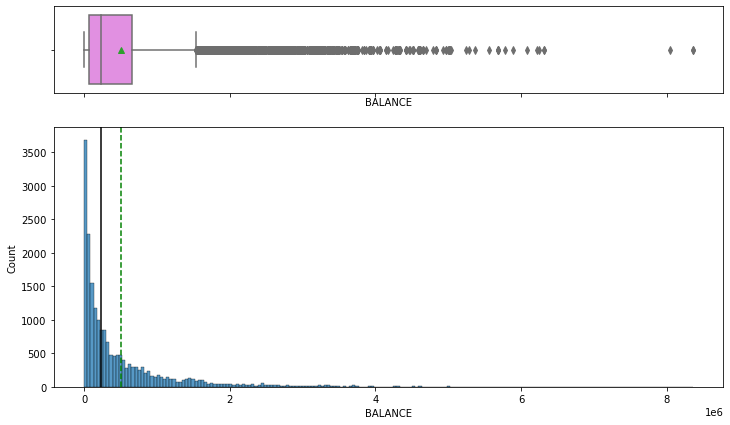

<IPython.core.display.Javascript object>

In [567]:
histogram_boxplot(data, "BALANCE")

- Balance amount data is right skewed and seems to have many outliers

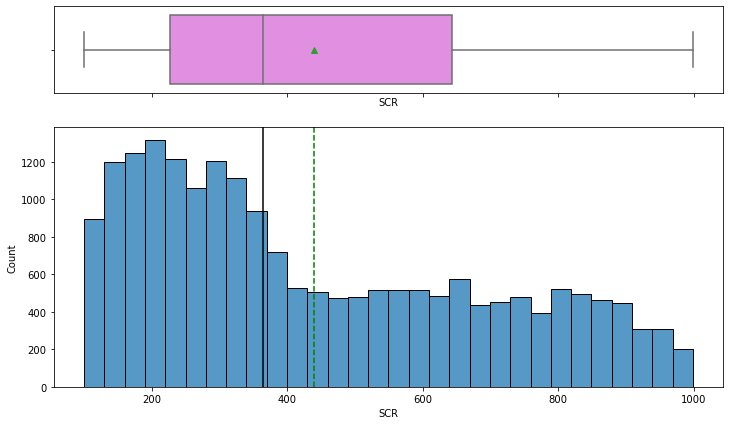

<IPython.core.display.Javascript object>

In [568]:
histogram_boxplot(data, "SCR")

- SCR skews slightly to the right with a mean of about 440 and median of 364
- Marketing scores could be improved with better outreach and alignment with customers as it leans towards the lower end.

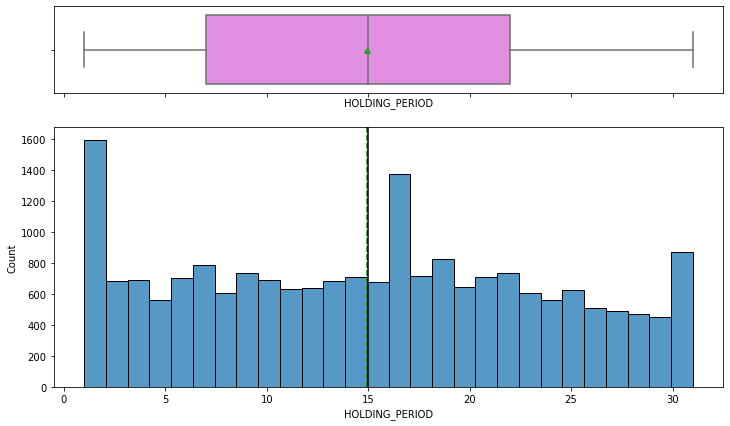

<IPython.core.display.Javascript object>

In [569]:
histogram_boxplot(data, "HOLDING_PERIOD")

- Holding period of assets are evenly distributed with mean and median around 15 days but can last up to about a month.

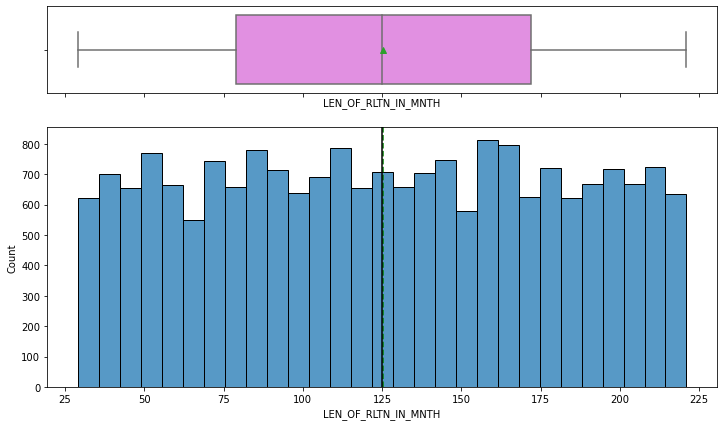

<IPython.core.display.Javascript object>

In [570]:
histogram_boxplot(data, "LEN_OF_RLTN_IN_MNTH")

-Customers' length of relationship is pretty widely and evenly distributed ranging from 25 months to 225 months

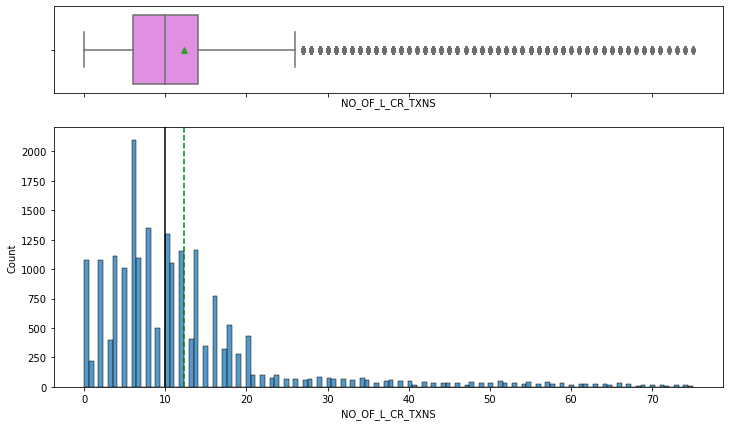

<IPython.core.display.Javascript object>

In [571]:
histogram_boxplot(data, "NO_OF_L_CR_TXNS")

- The number of credit transactions representation is skewed heavily to the right with most people having only 0-20 of them.
- There seems to be some outliers
- We could check to see whether an increase in these numbers correlate with an increased chance of taking loans.

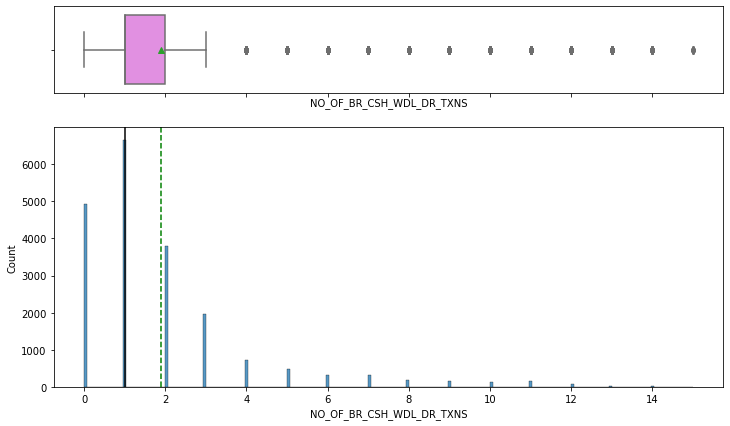

<IPython.core.display.Javascript object>

In [572]:
histogram_boxplot(data, "NO_OF_BR_CSH_WDL_DR_TXNS")

- Most people seem to withdraw cash between 0 and 2 times
- There are some outliers present in this data with quite a few people withdrawing cash between 4-15 times

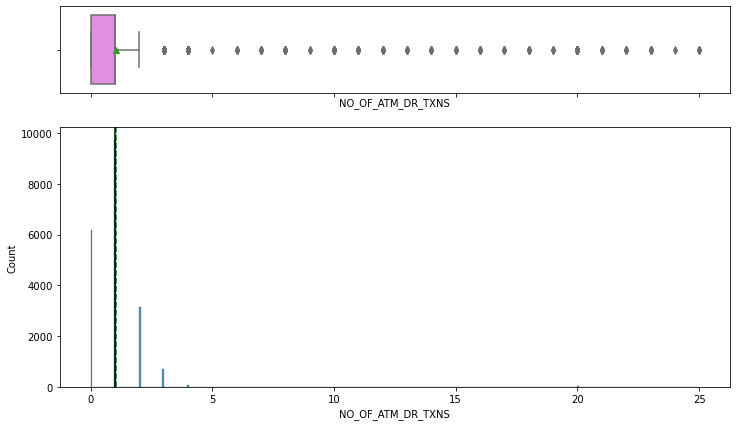

<IPython.core.display.Javascript object>

In [573]:
histogram_boxplot(data, "NO_OF_ATM_DR_TXNS")

-Most number of transactions are either 0 or 1 but there are outliers that range up to 25 transactions

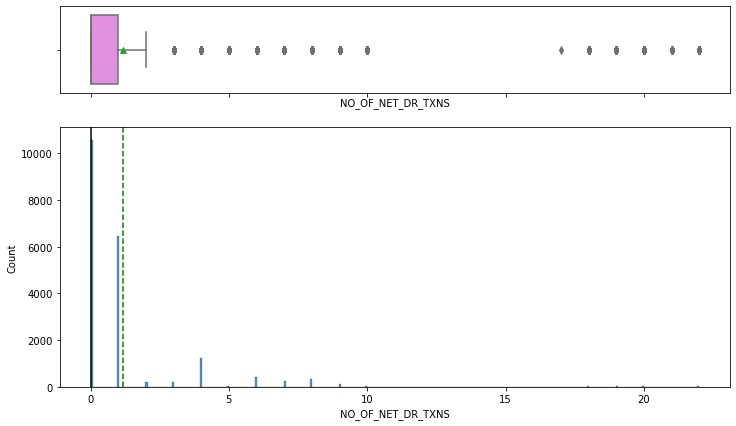

<IPython.core.display.Javascript object>

In [574]:
histogram_boxplot(data, "NO_OF_NET_DR_TXNS")

-Most number of transactions are either 0 or 1 but there are outliers that range up to 22 transactions

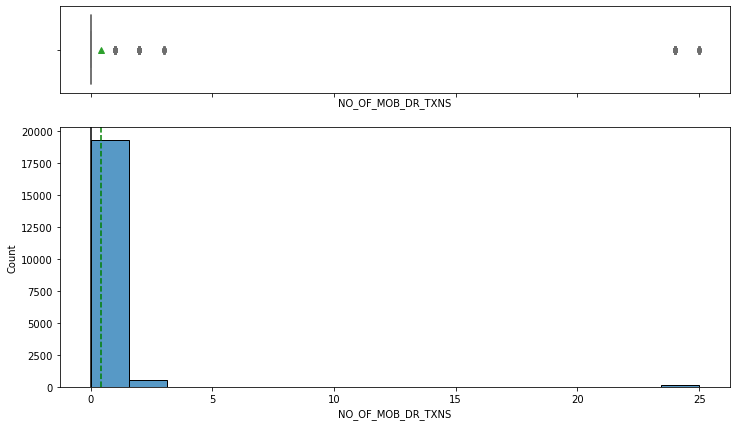

<IPython.core.display.Javascript object>

In [575]:
histogram_boxplot(data, "NO_OF_MOB_DR_TXNS")

- Most number of transactions is zero, but there are outliers that range up to 25

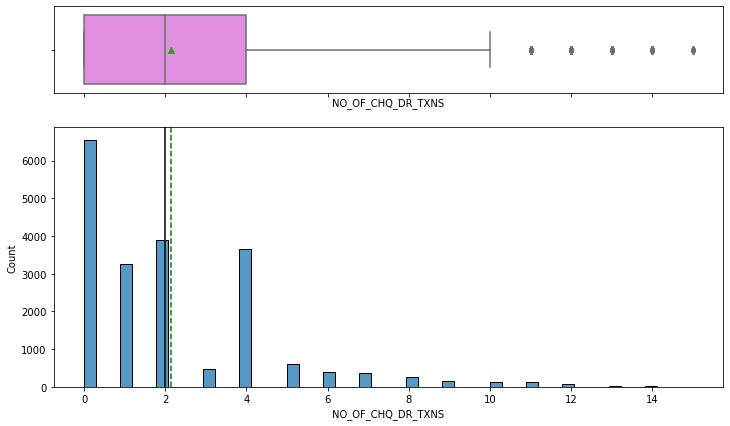

<IPython.core.display.Javascript object>

In [576]:
histogram_boxplot(data, "NO_OF_CHQ_DR_TXNS")

- Average number of check transactions is about 2 but ranges up to 15, the chart skews right.

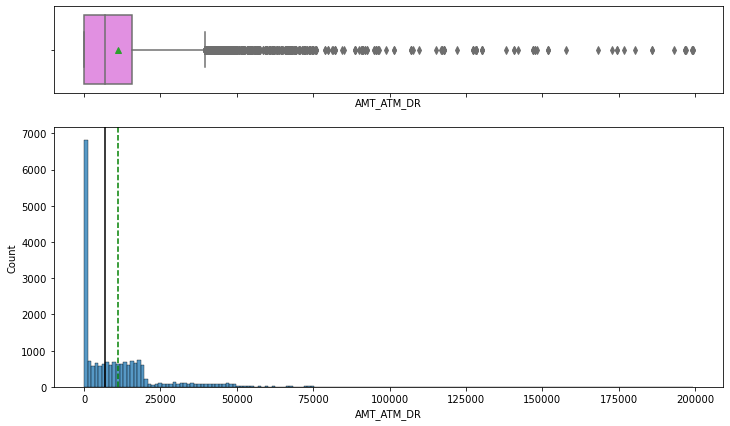

<IPython.core.display.Javascript object>

In [577]:
histogram_boxplot(data, "AMT_ATM_DR")

- Most customers seemed to not have withdrawn any cash through the ATM
- Wide range of values up to 200k, indicating outliers

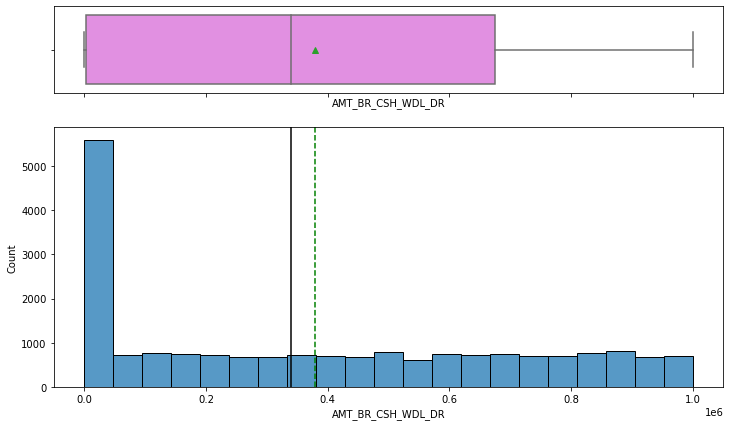

<IPython.core.display.Javascript object>

In [578]:
histogram_boxplot(data, "AMT_BR_CSH_WDL_DR")

- Most people did not seem to withdraw any cash from branch but the rest of the distribution looks like similar amounts of people withdrew cash in the range of 3k-199k

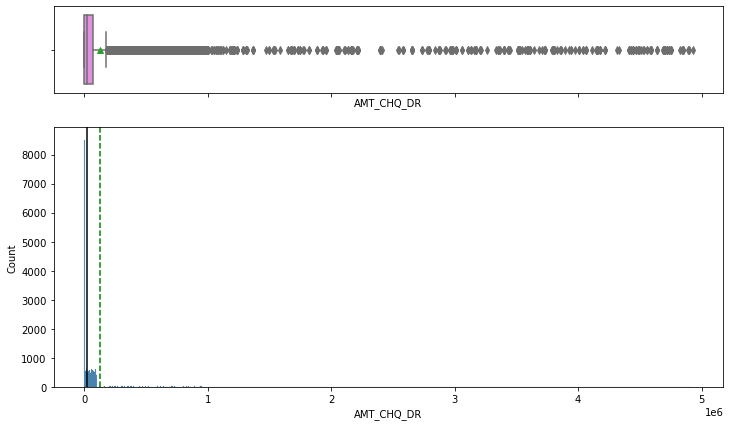

<IPython.core.display.Javascript object>

In [579]:
histogram_boxplot(data, "AMT_CHQ_DR")

- Avg amount debited by check is about 124k which is much greater than the median of 23k, indicating a right skew
- There are many outliers present as the amount goes up to about 5M dollars.

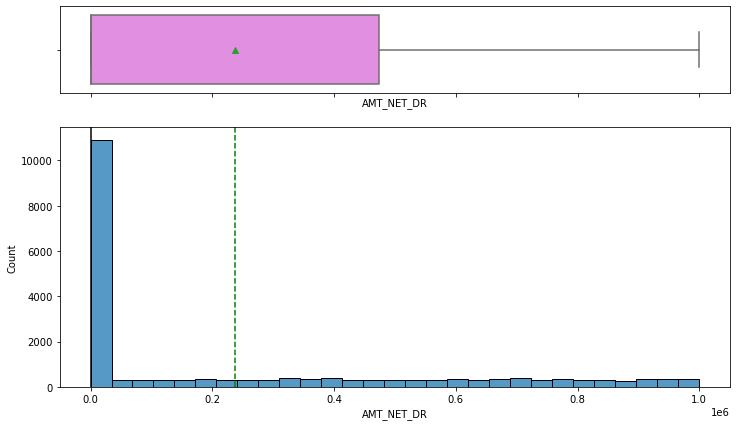

<IPython.core.display.Javascript object>

In [580]:
histogram_boxplot(data, "AMT_NET_DR")

- Avg amount debited by net is about 237k which is much greater than the median of 0, indicating a severe right skew
- There are many outliers present as the amount goes up to about 1M dollars.

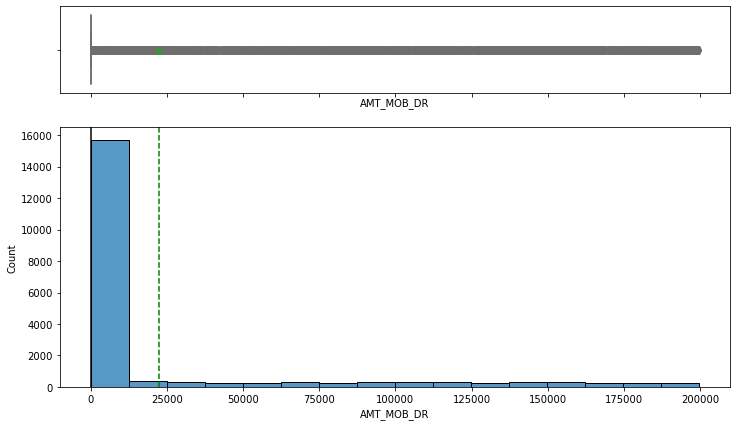

<IPython.core.display.Javascript object>

In [581]:
histogram_boxplot(data, "AMT_MOB_DR")

- Avg amount debited by net is about 22k which is greater than the median of 0, indicating a right skew
- There are many outliers present as the amount goes up to about 200k.

In [582]:
# creating labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

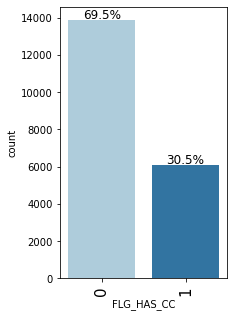

<IPython.core.display.Javascript object>

In [583]:
labeled_barplot(data, "FLG_HAS_CC", perc=True)

- Most people do not have a credit card

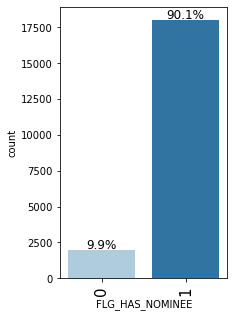

<IPython.core.display.Javascript object>

In [584]:
labeled_barplot(data, "FLG_HAS_NOMINEE", perc=True)

- Most people have a nominee, less than 10% don't.

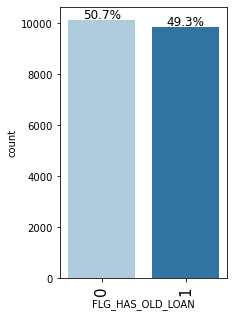

<IPython.core.display.Javascript object>

In [585]:
labeled_barplot(data, "FLG_HAS_OLD_LOAN", perc=True)

- The number of those who have not previously taken out a loan is similar to those who have.

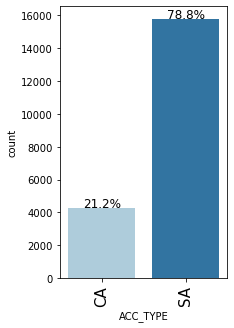

<IPython.core.display.Javascript object>

In [586]:
labeled_barplot(data, "ACC_TYPE", perc=True)

- Almost 80% of accounts are savings accounts with only a little over 20% being current accounts

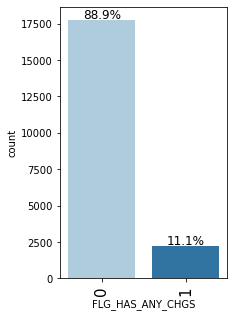

<IPython.core.display.Javascript object>

In [587]:
labeled_barplot(data, "FLG_HAS_ANY_CHGS", perc=True)

- Most customers do not have any banking charges

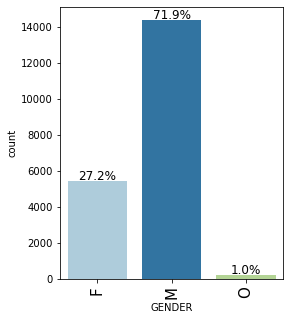

<IPython.core.display.Javascript object>

In [588]:
labeled_barplot(data, "GENDER", perc=True)

- Customer base is mostly (71%) male, with females following (27%) and then other being about 1% of the customer base.

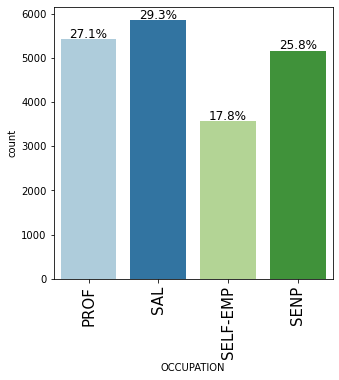

<IPython.core.display.Javascript object>

In [589]:
labeled_barplot(data, "OCCUPATION", perc=True)

- Self-employed customers are the smallest group with the others roughly even in number

### Bivariate Analysis

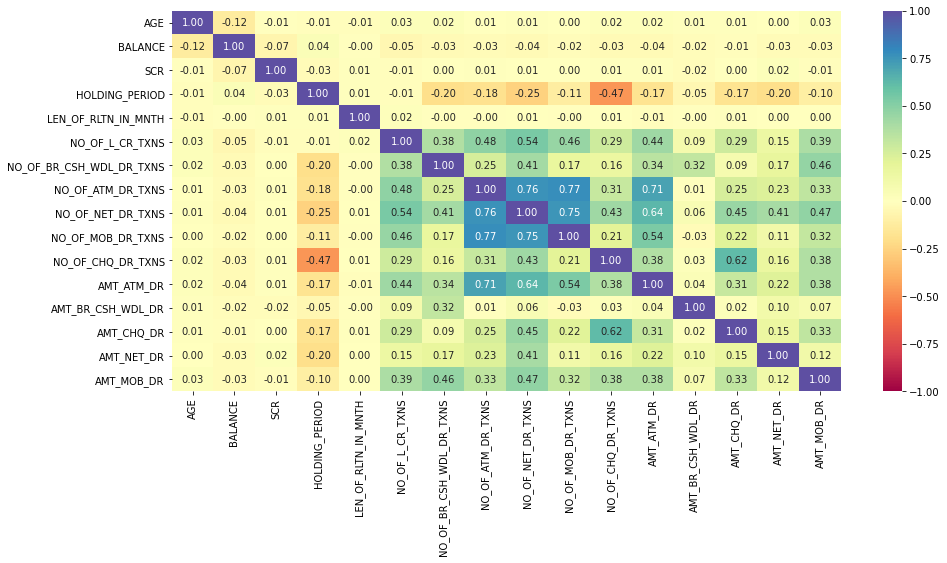

<IPython.core.display.Javascript object>

In [590]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Number of credit transactions are fairly correlated with the number of Net/Mobile/ATM transactions
- There is a high correlation between the number of ATM debit transactions and net/mobile debit transactions as well as amount withdrawn from ATM.
- Number of Net Banking Debit Transactions itself is highly correlated with Number of Mobile Banking Debit Transactions as well as amount withdrawn from ATM.
- Number of Mobile Banking Debit Transactions is moderately correlated with Amount debited by Cheque Transactions
- The Amount debited by Cheque Transactions is also pretty correlated with Number of Cheque Debit Transactions
- The largest negative correlation is between the holding period and the Number of Cheque Debit Transactions

In [591]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

TARGET          0     1    All
FLG_HAS_CC                    
All         17488  2512  20000
0           12454  1438  13892
1            5034  1074   6108
------------------------------------------------------------------------------------------------------------------------


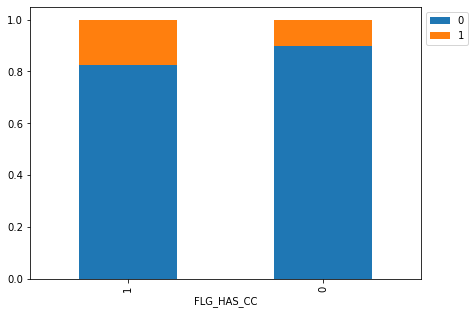

<IPython.core.display.Javascript object>

In [592]:
# Target vs Has Credit Card

stacked_barplot(data, "FLG_HAS_CC", "TARGET")

- Those who do have a credit card tended to respond to the campaign and take out more loans.

TARGET        0     1    All
ACC_TYPE                    
All       17488  2512  20000
SA        13965  1794  15759
CA         3523   718   4241
------------------------------------------------------------------------------------------------------------------------


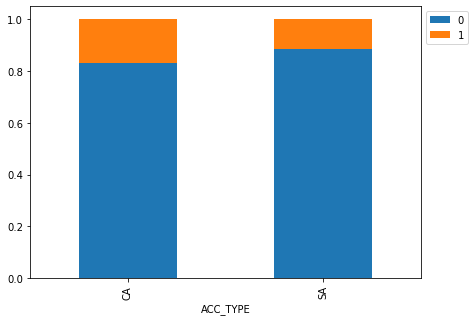

<IPython.core.display.Javascript object>

In [593]:
# Target vs Acc Type

stacked_barplot(data, "ACC_TYPE", "TARGET")

- Despite a smaller number of people having current accounts, more people with a current account were more likely to take out a loan than those with savings accounts.

TARGET               0     1    All
FLG_HAS_NOMINEE                    
All              17488  2512  20000
1                15736  2287  18023
0                 1752   225   1977
------------------------------------------------------------------------------------------------------------------------


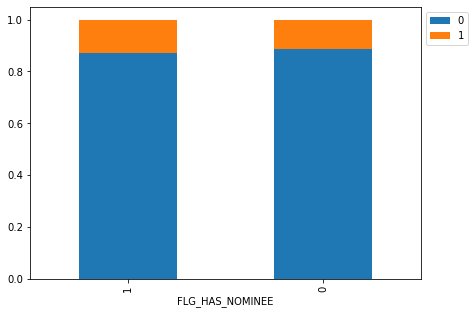

<IPython.core.display.Javascript object>

In [594]:
# Target vs Has Nominee

stacked_barplot(data, "FLG_HAS_NOMINEE", "TARGET")

- Roughly equal amounts of those who have and don't have nominees responded to the campaigns and took out loans. Those who do have nominees have a slightly higher # compared to the other.

TARGET                0     1    All
FLG_HAS_OLD_LOAN                    
All               17488  2512  20000
0                  8829  1312  10141
1                  8659  1200   9859
------------------------------------------------------------------------------------------------------------------------


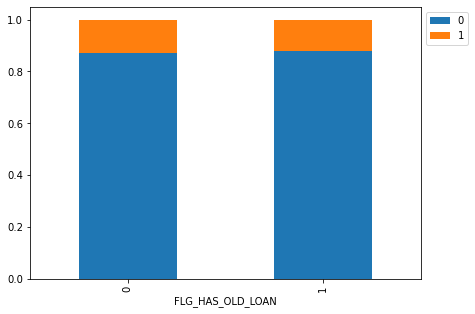

<IPython.core.display.Javascript object>

In [595]:
# Target vs Has Old Loans

stacked_barplot(data, "FLG_HAS_OLD_LOAN", "TARGET")

- Almost equal amounts of those who have loans and don't have loans in the past were responsive to the campaign and took out loans
- This may not be completely indicative of responsiveness

TARGET                0     1    All
FLG_HAS_ANY_CHGS                    
All               17488  2512  20000
0                 15649  2139  17788
1                  1839   373   2212
------------------------------------------------------------------------------------------------------------------------


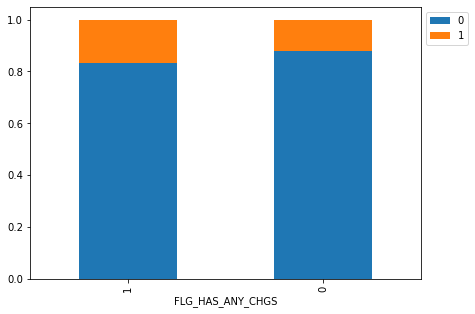

<IPython.core.display.Javascript object>

In [596]:
# Target vs Has Banking Charges

stacked_barplot(data, "FLG_HAS_ANY_CHGS", "TARGET")

- Those who had banking charges were slightly more likely to take out loans in response to the campaign

TARGET      0     1    All
GENDER                    
All     17488  2512  20000
M       12446  1930  14376
F        4893   540   5433
O         149    42    191
------------------------------------------------------------------------------------------------------------------------


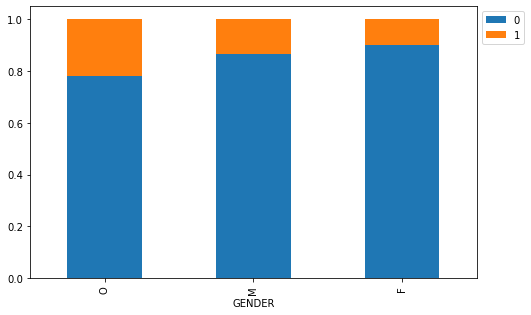

<IPython.core.display.Javascript object>

In [597]:
# Target vs Gender

stacked_barplot(data, "GENDER", "TARGET")

- The diagram shows that the "Other" gender category had most responsiveness to the loan campaign with males being the second largest group.

TARGET          0     1    All
OCCUPATION                    
All         17488  2512  20000
SELF-EMP     2843   725   3568
PROF         4762   655   5417
SAL          5265   590   5855
SENP         4618   542   5160
------------------------------------------------------------------------------------------------------------------------


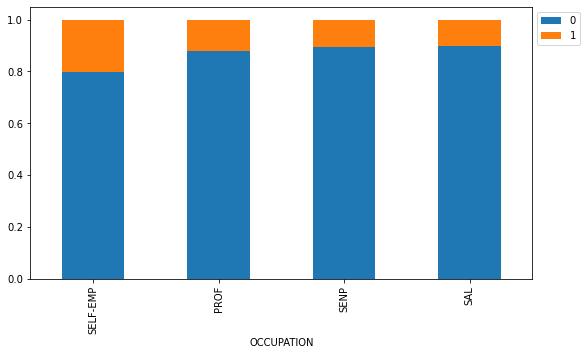

<IPython.core.display.Javascript object>

In [598]:
# Target vs Occupation

stacked_barplot(data, "OCCUPATION", "TARGET")

- Those who are self-employed were most likely to take out loans with those who are salaried or SENP taking out the least amount.

In [599]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

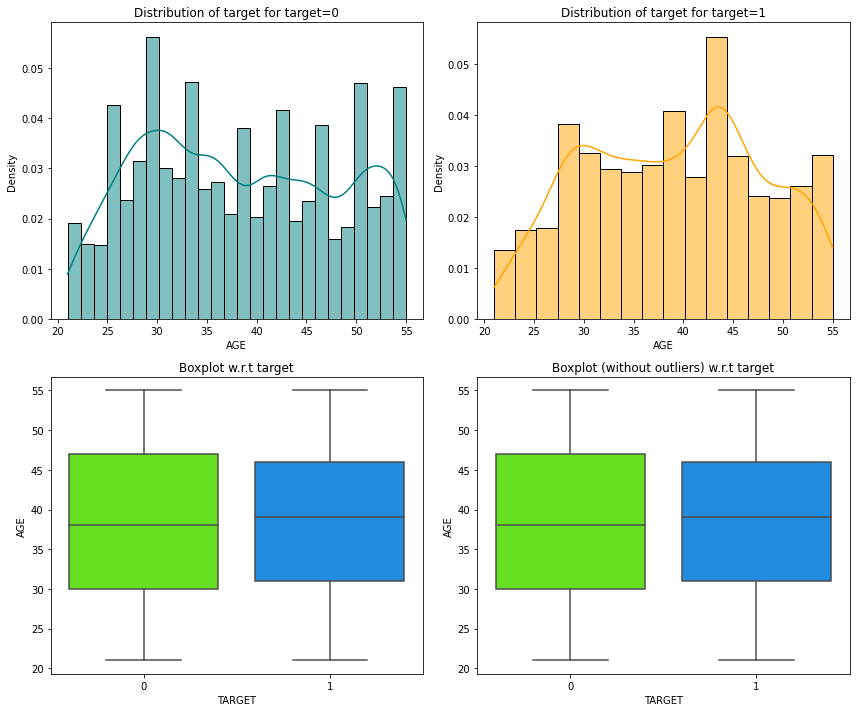

<IPython.core.display.Javascript object>

In [600]:
distribution_plot_wrt_target(data, "AGE", "TARGET")

- The customers who were non-responders have a bigger range than those who were responders.


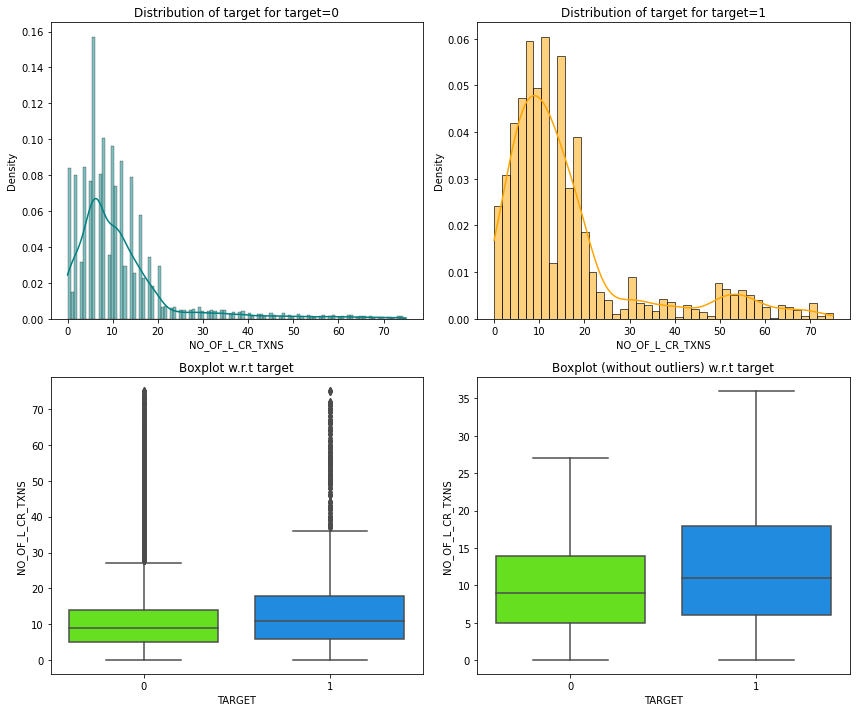

<IPython.core.display.Javascript object>

In [601]:
distribution_plot_wrt_target(data, "NO_OF_L_CR_TXNS", "TARGET")

- The distribution for number of credit transactions is fairly similar and doesn't seem to be a huge predictor for those taking out loans although the number credit transactions is slightly higher in those who do take out loans.

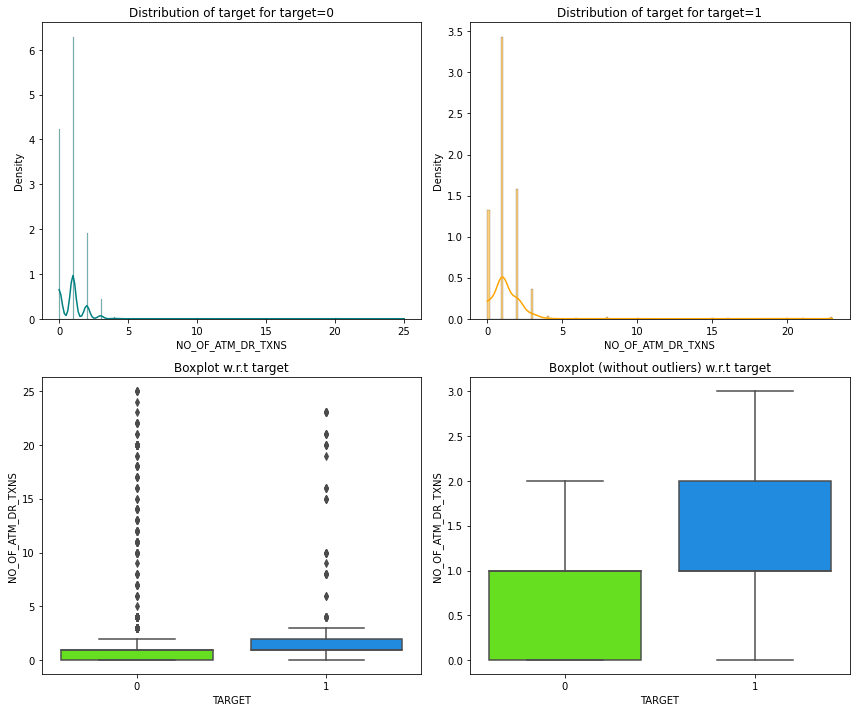

<IPython.core.display.Javascript object>

In [602]:
distribution_plot_wrt_target(data, "NO_OF_ATM_DR_TXNS", "TARGET")

- Boxplot shows that the people who were responders have a higher number of ATM Debit Transactions

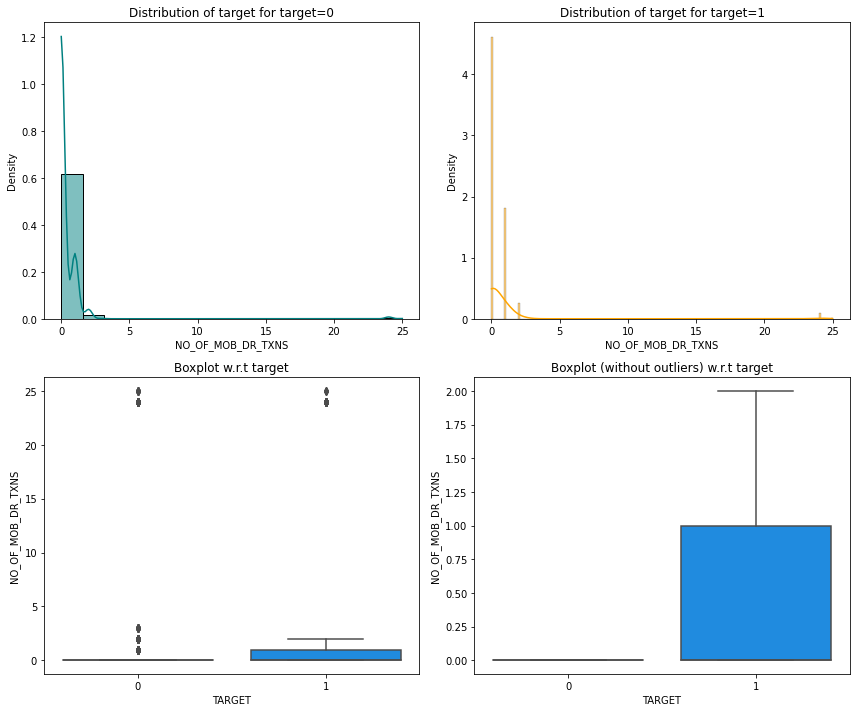

<IPython.core.display.Javascript object>

In [603]:
distribution_plot_wrt_target(data, "NO_OF_MOB_DR_TXNS", "TARGET")

- Number of Mobile debit transactions seems to be slightly higher in those who were responders.

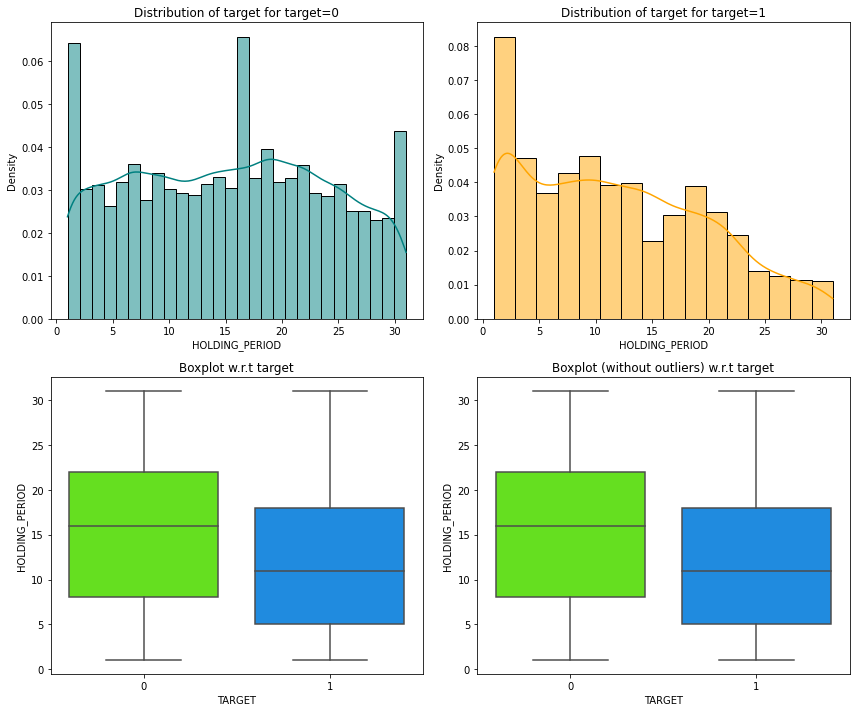

<IPython.core.display.Javascript object>

In [604]:
distribution_plot_wrt_target(data, "HOLDING_PERIOD", "TARGET")

- Holding period for those who do not take the loans is a more even distribution and is also slightly larger than those who do take the loans.

In [605]:
# Finding outliers in the columns

Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [606]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

AGE                         0.00000
BALANCE                     8.16000
SCR                         0.00000
HOLDING_PERIOD              0.00000
LEN_OF_RLTN_IN_MNTH         0.00000
NO_OF_L_CR_TXNS             8.96000
NO_OF_BR_CSH_WDL_DR_TXNS   13.25000
NO_OF_ATM_DR_TXNS           4.60000
NO_OF_NET_DR_TXNS          13.76500
NO_OF_MOB_DR_TXNS          22.74500
NO_OF_CHQ_DR_TXNS           1.16000
AMT_ATM_DR                  5.59000
AMT_BR_CSH_WDL_DR           0.00000
AMT_CHQ_DR                  9.79000
AMT_NET_DR                  0.00000
AMT_MOB_DR                 22.74500
dtype: float64

<IPython.core.display.Javascript object>

- In order to keep model realistic, we have identified outliers and will keep them untreated.

### Data Prep

- Leaving outliers untreated
- Creating dummy variables for Gender & Occupation and leaving other categorical variables in their binary.

In [607]:
# dropping Target Variable
X = data.drop(["TARGET"], axis=1)

Y = data["TARGET"]

X = pd.get_dummies(X, columns=["GENDER", "OCCUPATION", "ACC_TYPE"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1  # stratified=Yes
)

<IPython.core.display.Javascript object>

In [608]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (14000, 26)
Shape of test set :  (6000, 26)
Percentage of classes in training set:
0   0.87336
1   0.12664
Name: TARGET, dtype: float64
Percentage of classes in test set:
0   0.87683
1   0.12317
Name: TARGET, dtype: float64


<IPython.core.display.Javascript object>

## Model Building

Model evaluation criterion-

- Wrong predictions
    - Predicting a customer will take the loan but in reality the customer will not take the loan - Loss of resources
    - Predicting a customer will not take the loan but in reality the customer was going to take the loan - Loss of opportunity

- Which case is more important?
    - Losing a potential customer by predicting that the customer will not be taking the loan but in reality the customer was going to take the loan.
- How to reduce this loss i.e need to reduce False Negatives?
    - Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

### Logistic Regression

In [609]:
# defining a function to compute different metrics to check performance of a classification model


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [610]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [611]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Finding Coefficients

In [612]:
log_odds = lg.coef_[0]
pd.options.display.float_format = "{:.5f}".format
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,GENDER_M,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA
coef,-0.02624,-0.00000,0.00038,-0.04480,-0.00423,0.01613,0.00328,0.00014,0.00063,-0.00046,-0.00049,0.00196,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00026,-0.00134,-0.00127,-0.00036,-0.00000,-0.00183,0.00179,-0.00100,-0.00192


<IPython.core.display.Javascript object>

Coefficients of Credit Transactions, Branch Cash Withdrawals, ATM Debit Transactions, Net Banking Debit Transactions, Has CC, and Has Banking Charges, and self-employed Occupation are positive. An increase in these will lead to an increase in chances of taking a loan.

Coefficients of Age, Holding Period, Length of Relationship, Number of Cheque Debit Transactions, Has Nominee, Has Old Loans,  some Genders, and some levels of occupation are negative. An increase in these will lead to a decrease in chances of taking a personal loan.

Some variable coefficients are zero, in which case there seems to be no linear relationship between the variables and whether the customer may take out a personal loan or not.

In [613]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,GENDER_M,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA
Odds,0.97410,1.00000,1.00038,0.95618,0.99578,1.01626,1.00328,1.00014,1.00063,0.99954,0.99951,1.00196,1.00000,1.00000,1.00000,1.00000,1.00000,1.00026,0.99867,0.99873,0.99964,1.00000,0.99817,1.00179,0.99900,0.99808
Change_odd%,-2.58986,-0.00004,0.03826,-4.38155,-0.42182,1.62640,0.32847,0.01369,0.06301,-0.04586,-0.04922,0.19572,-0.00009,0.00000,0.00001,-0.00000,0.00015,0.02606,-0.13347,-0.12730,-0.03646,-0.00038,-0.18273,0.17915,-0.10013,-0.19190


<IPython.core.display.Javascript object>

- Age: Holding all other features constant a 1 unit increase in Age will increase the odds of a customer taking the  loan by 0.97 times or a 2% decrease in the odds.
- Balance: Holding all other features constant a 1 unit increase in Balance will increase the odds of taking a loan by 1.0 times or a 0.00004% decrease in the odds.
- SCR: Holding all other features constant a 1 unit increase in SCR will increase the odds of taking a loan by 1 times or a 0.04% increase in the odds.
- Holding period: Holding all other features constant a 1 unit increase in Holding Period will increase the odds of a customer taking a loan by 0.95 times or a 4.4% decrease in the odds.
- Length of relationship in months: Holding all other features constant a 1 unit increase in Length of relationship will increase the odds of a customer taking a loan by 0.995 times or a 4.2% decrease in the odds.
- Holding period: Holding all other features constant a 1 unit increase in Holding Period will increase the odds of a customer taking a loan by 0.95 times or a 4.4% decrease in the odds.
- Number of Credit Transactions: Holding all other features constant a 1 unit increase in # of credit transactions will increase the odds of a customer taking a loan by 1.01 times or a 1.62% increase in the odds.
- Branch Cash Withdrawal Debit Transactions, Number of ATM Debit Transactions, Number of Net Banking Debit Transactions, and FLG has CC have less than a percent increase in the odds of taking a loan with every 1 unit increase.
- Number of Mobile Banking Debit Transactions, Number of Cheque Debit Transactions, Has old Loans, Some occupations, account type SA, and has Nominee decrease less than 1% in odds with every increase of 1 unit.

### Confusion Matrices

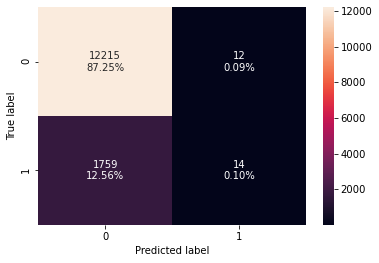

<IPython.core.display.Javascript object>

In [614]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [615]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.87350,0.00790,0.53846,0.01556


<IPython.core.display.Javascript object>

- Recall value poor compared to precision and accuracy. Accuracy value the best.

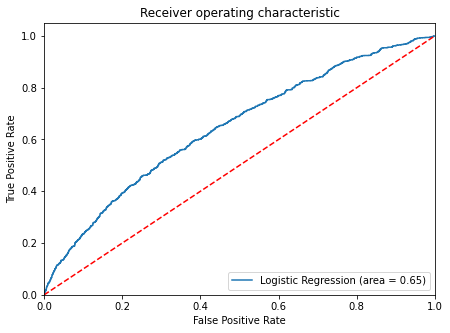

<IPython.core.display.Javascript object>

In [616]:
# ROC Curve

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression area of 0.65 is okay, it is not ideal

In [617]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.15115005376972232


<IPython.core.display.Javascript object>

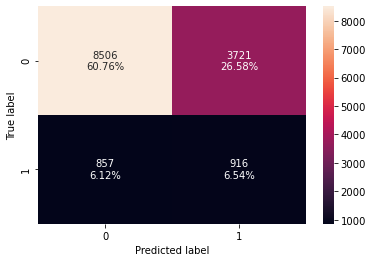

<IPython.core.display.Javascript object>

In [618]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [619]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.67300,0.51664,0.19754,0.28580


<IPython.core.display.Javascript object>

- The recall is much better than it was with the last model.
- Accuracy slightly lower
- Precision went down significantly though which is not good because it can lead to a loss of resources, there should be a balance.

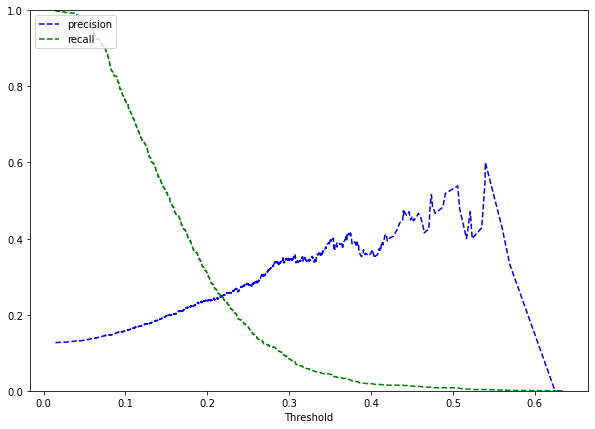

<IPython.core.display.Javascript object>

In [620]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- 0.22 threshold maximizes precision and recall

In [621]:
# setting the threshold
optimal_threshold_curve = 0.27


<IPython.core.display.Javascript object>

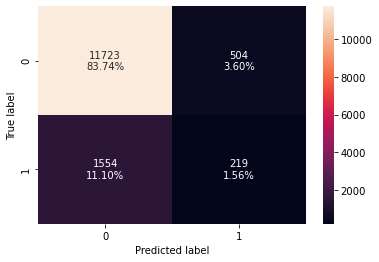

<IPython.core.display.Javascript object>

In [622]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [623]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.85300,0.12352,0.30290,0.17548


<IPython.core.display.Javascript object>

- Not the ideal model to use if you want a really good balance of both recall and precision, the earlier model with higher recall is probably better to use.

In [642]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.15 Threshold",
    "Logistic Regression-0.22 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.15 Threshold,Logistic Regression-0.22 Threshold
Accuracy,0.87350,0.67300,0.85300
Recall,0.00790,0.51664,0.12352
Precision,0.53846,0.19754,0.30290
F1,0.01556,0.28580,0.17548


<IPython.core.display.Javascript object>

### Test

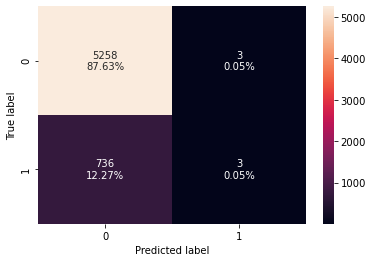

<IPython.core.display.Javascript object>

In [634]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [635]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.87683,0.00406,0.50000,0.00805


<IPython.core.display.Javascript object>

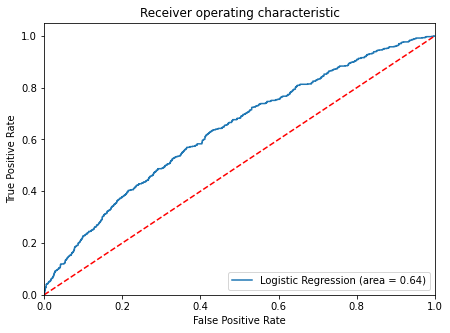

<IPython.core.display.Javascript object>

In [636]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression Area of 0.64 is similar to our previous training area of 0.65 but still not the best it could be

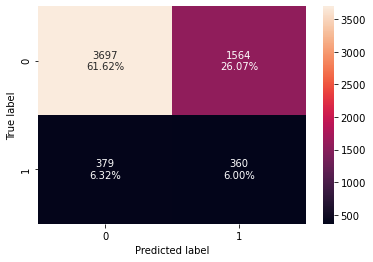

<IPython.core.display.Javascript object>

In [637]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [638]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.67617,0.48714,0.18711,0.27037


<IPython.core.display.Javascript object>

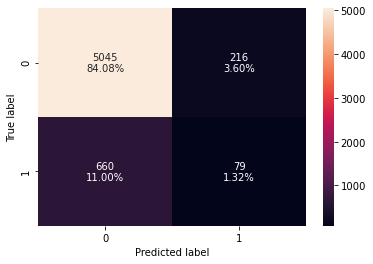

<IPython.core.display.Javascript object>

In [639]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [640]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.85400,0.10690,0.26780,0.15280


<IPython.core.display.Javascript object>

In [643]:
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.15 Threshold",
    "Logistic Regression-0.22 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.15 Threshold,Logistic Regression-0.22 Threshold
Accuracy,0.87683,0.67617,0.85400
Recall,0.00406,0.48714,0.10690
Precision,0.50000,0.18711,0.26780
F1,0.00805,0.27037,0.15280


<IPython.core.display.Javascript object>

#### Conclusions

We have been able to build a predictive model that can be used by the bank to find the potential customers who will be willing to take a loan with recall of 0.49 on the training set.
- The logistic regression models are giving a low performance on training and test set.

Using the model with default threshold the model will give a low recall but ok precision score - This model will help the bank save resources but lose on potential customers.

Using the model with 0.15 threshold the model will give a higher recall but low precision score - This model will help the bank identify potential customers effectively but the cost of resources will be high.

Using the model with 0.22 threshold the model will give a low but balances recall and precision score - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.


## Decision Tree


In [644]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [645]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [646]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

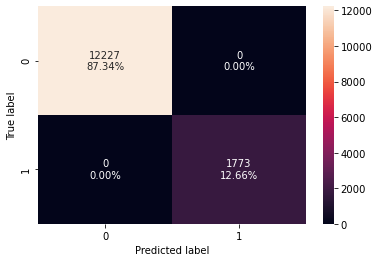

<IPython.core.display.Javascript object>

In [647]:
confusion_matrix_sklearn(model, X_train, y_train)

In [648]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

There are no errors in this training data set so the model has performed well
- However, decision trees will continue to grow and become hyperspecific if there are no restrictions

In [649]:
feature_names = list(X_train.columns)
print(feature_names)

['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'GENDER_M', 'GENDER_O', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_SA']


<IPython.core.display.Javascript object>

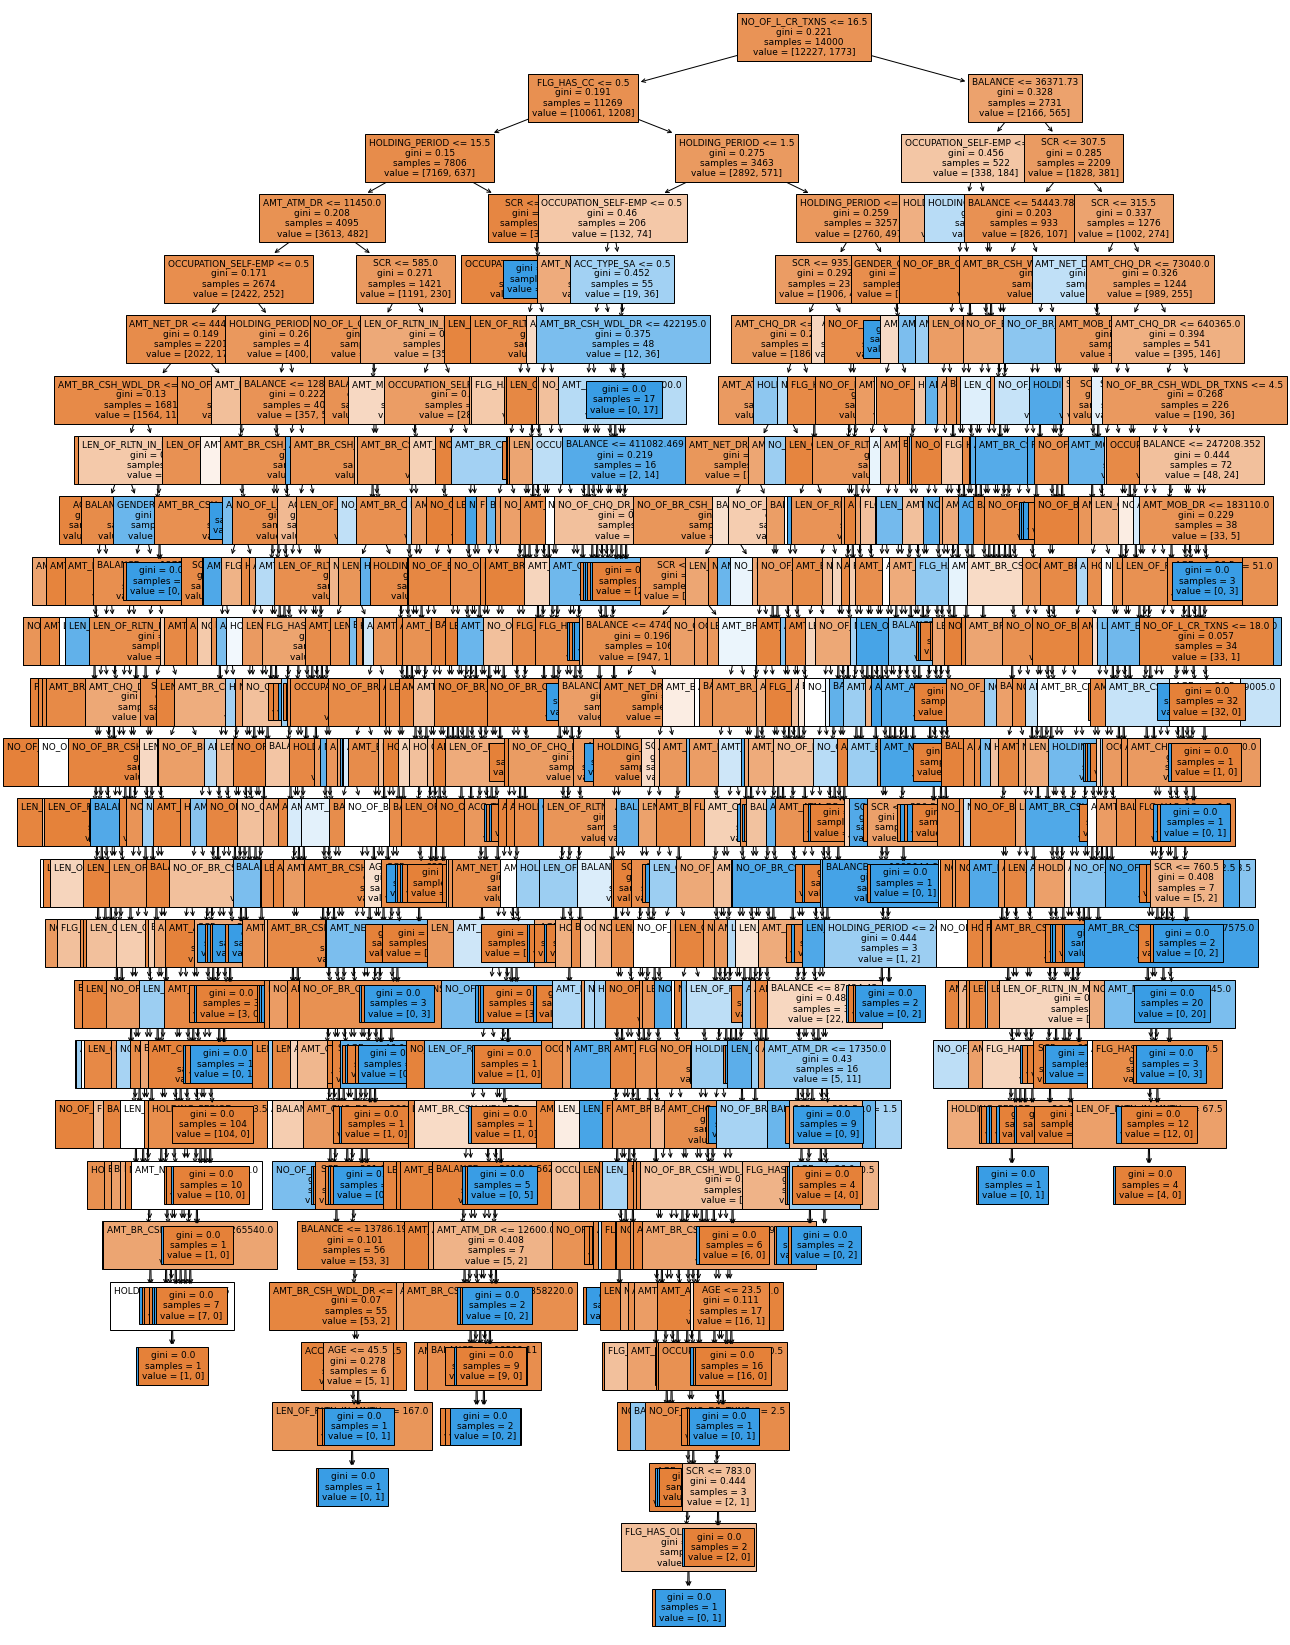

<IPython.core.display.Javascript object>

In [650]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [651]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- NO_OF_L_CR_TXNS <= 16.50
|   |--- FLG_HAS_CC <= 0.50
|   |   |--- HOLDING_PERIOD <= 15.50
|   |   |   |--- AMT_ATM_DR <= 11450.00
|   |   |   |   |--- OCCUPATION_SELF-EMP <= 0.50
|   |   |   |   |   |--- AMT_NET_DR <= 444406.50
|   |   |   |   |   |   |--- AMT_BR_CSH_WDL_DR <= 985395.00
|   |   |   |   |   |   |   |--- AGE <= 30.50
|   |   |   |   |   |   |   |   |--- AGE <= 21.50
|   |   |   |   |   |   |   |   |   |--- AMT_CHQ_DR <= 52110.00
|   |   |   |   |   |   |   |   |   |   |--- HOLDING_PERIOD <= 13.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- HOLDING_PERIOD >  13.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- AMT_CHQ_DR >  52110.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |   |   |--- AGE >  21.50
|   |   |   |   |   |   |   |   |   |--- AMT_ATM_DR <= 106

<IPython.core.display.Javascript object>

In [652]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
SCR                      0.10877
BALANCE                  0.10471
LEN_OF_RLTN_IN_MNTH      0.08555
HOLDING_PERIOD           0.08379
AMT_ATM_DR               0.07766
NO_OF_L_CR_TXNS          0.07682
AMT_BR_CSH_WDL_DR        0.07518
AGE                      0.06789
AMT_CHQ_DR               0.05879
AMT_NET_DR               0.04414
AMT_MOB_DR               0.03444
NO_OF_BR_CSH_WDL_DR_TXNS 0.03337
OCCUPATION_SELF-EMP      0.02373
NO_OF_CHQ_DR_TXNS        0.02278
FLG_HAS_OLD_LOAN         0.01392
FLG_HAS_CC               0.01327
ACC_TYPE_SA              0.01223
FLG_HAS_NOMINEE          0.01128
NO_OF_ATM_DR_TXNS        0.01113
OCCUPATION_SAL           0.01021
NO_OF_NET_DR_TXNS        0.00945
FLG_HAS_ANY_CHGS         0.00867
GENDER_M                 0.00669
OCCUPATION_SENP          0.00379
GENDER_O                 0.00160
NO_OF_MOB_DR_TXNS        0.00014


<IPython.core.display.Javascript object>

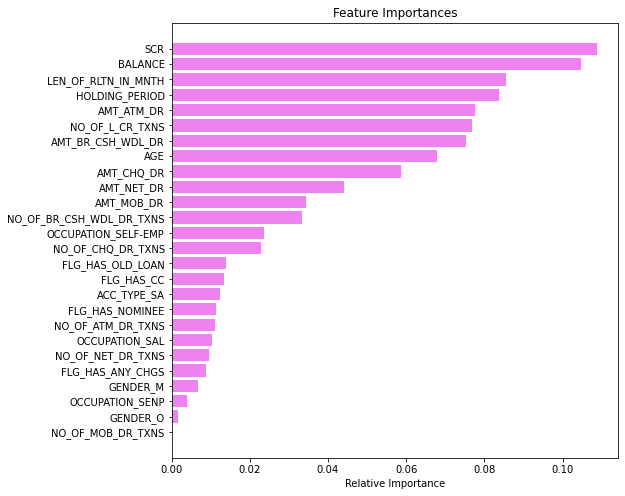

<IPython.core.display.Javascript object>

In [653]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- SCR is the most important feature followed by Balance and Length of relationship
- Since the tree is complex and difficult to interpret we can prune it to reduce complexity

In [654]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

<IPython.core.display.Javascript object>

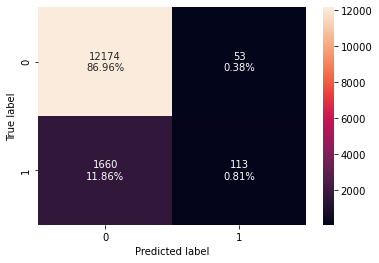

<IPython.core.display.Javascript object>

In [655]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [656]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.87764,0.06373,0.68072,0.11655


<IPython.core.display.Javascript object>

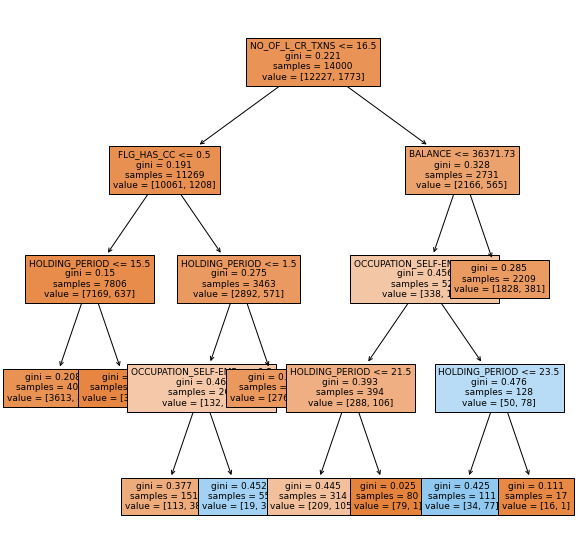

<IPython.core.display.Javascript object>

In [657]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [658]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- NO_OF_L_CR_TXNS <= 16.50
|   |--- FLG_HAS_CC <= 0.50
|   |   |--- HOLDING_PERIOD <= 15.50
|   |   |   |--- weights: [3613.00, 482.00] class: 0
|   |   |--- HOLDING_PERIOD >  15.50
|   |   |   |--- weights: [3556.00, 155.00] class: 0
|   |--- FLG_HAS_CC >  0.50
|   |   |--- HOLDING_PERIOD <= 1.50
|   |   |   |--- OCCUPATION_SELF-EMP <= 0.50
|   |   |   |   |--- weights: [113.00, 38.00] class: 0
|   |   |   |--- OCCUPATION_SELF-EMP >  0.50
|   |   |   |   |--- weights: [19.00, 36.00] class: 1
|   |   |--- HOLDING_PERIOD >  1.50
|   |   |   |--- weights: [2760.00, 497.00] class: 0
|--- NO_OF_L_CR_TXNS >  16.50
|   |--- BALANCE <= 36371.73
|   |   |--- OCCUPATION_SELF-EMP <= 0.50
|   |   |   |--- HOLDING_PERIOD <= 21.50
|   |   |   |   |--- weights: [209.00, 105.00] class: 0
|   |   |   |--- HOLDING_PERIOD >  21.50
|   |   |   |   |--- weights: [79.00, 1.00] class: 0
|   |   |--- OCCUPATION_SELF-EMP >  0.50
|   |   |   |--- HOLDING_PERIOD <= 23.50
|   |   |   |   |--- weights: [34.00,

<IPython.core.display.Javascript object>

Tree is much simpler
Model performance has decreased and recall became very poor.

In [659]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
SCR                      0.10877
BALANCE                  0.10471
LEN_OF_RLTN_IN_MNTH      0.08555
HOLDING_PERIOD           0.08379
AMT_ATM_DR               0.07766
NO_OF_L_CR_TXNS          0.07682
AMT_BR_CSH_WDL_DR        0.07518
AGE                      0.06789
AMT_CHQ_DR               0.05879
AMT_NET_DR               0.04414
AMT_MOB_DR               0.03444
NO_OF_BR_CSH_WDL_DR_TXNS 0.03337
OCCUPATION_SELF-EMP      0.02373
NO_OF_CHQ_DR_TXNS        0.02278
FLG_HAS_OLD_LOAN         0.01392
FLG_HAS_CC               0.01327
ACC_TYPE_SA              0.01223
FLG_HAS_NOMINEE          0.01128
NO_OF_ATM_DR_TXNS        0.01113
OCCUPATION_SAL           0.01021
NO_OF_NET_DR_TXNS        0.00945
FLG_HAS_ANY_CHGS         0.00867
GENDER_M                 0.00669
OCCUPATION_SENP          0.00379
GENDER_O                 0.00160
NO_OF_MOB_DR_TXNS        0.00014


<IPython.core.display.Javascript object>

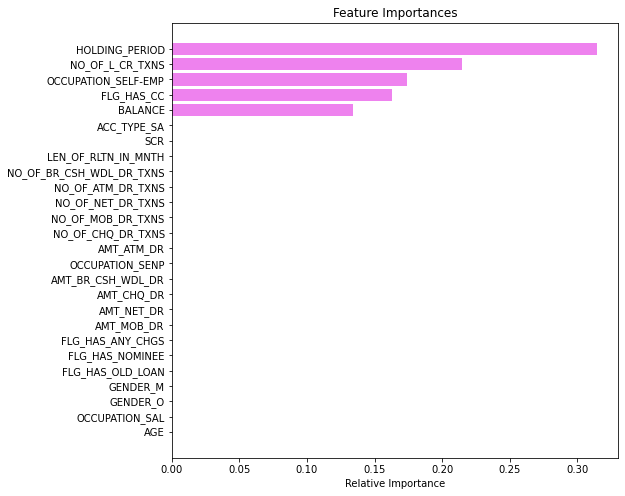

<IPython.core.display.Javascript object>

In [660]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Feature importantances have some changes in order

Observations:
- Age seems to not matter as much here whereas it was listed higher in the previous feature importances chart.
- Holding period seems to be key feature here instead of SCR

In [663]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [664]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00004,0.00014
2,0.00005,0.00028
3,0.00005,0.00043
4,0.00005,0.00071
...,...,...
488,0.00160,0.21215
489,0.00160,0.21376
490,0.00195,0.21571
491,0.00238,0.21809


<IPython.core.display.Javascript object>

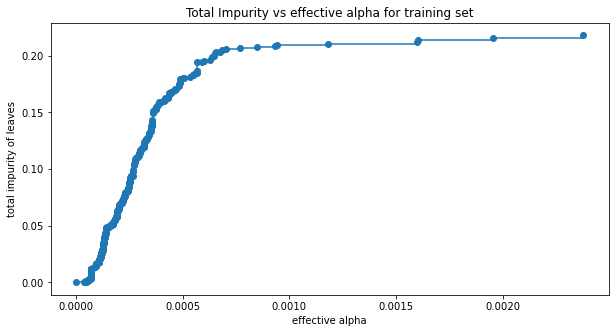

<IPython.core.display.Javascript object>

In [665]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [666]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0031207553202238503


<IPython.core.display.Javascript object>

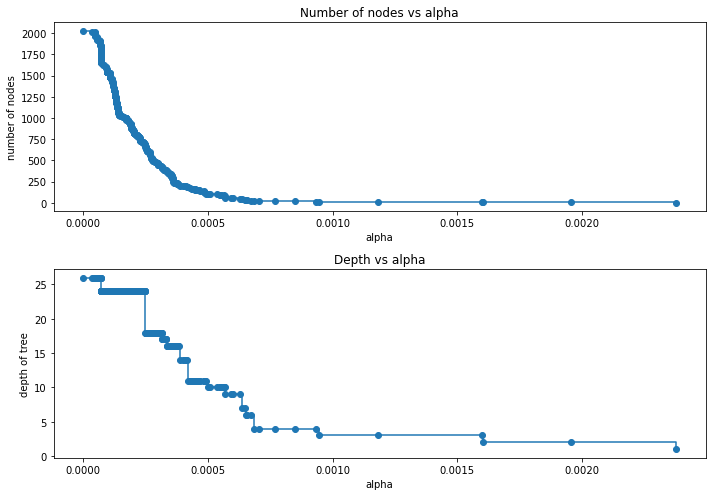

<IPython.core.display.Javascript object>

In [667]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [668]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

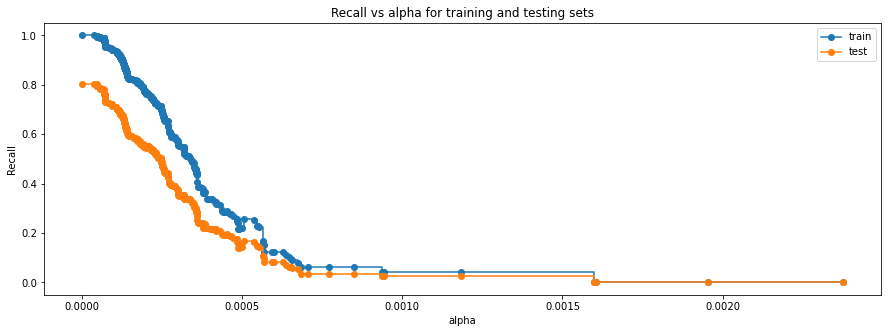

<IPython.core.display.Javascript object>

In [669]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [670]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

### Testing

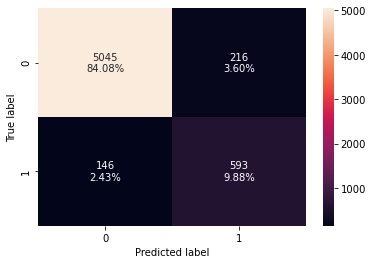

<IPython.core.display.Javascript object>

In [671]:
confusion_matrix_sklearn(model, X_test, y_test)

In [672]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.93967,0.80244,0.73300,0.76615


<IPython.core.display.Javascript object>

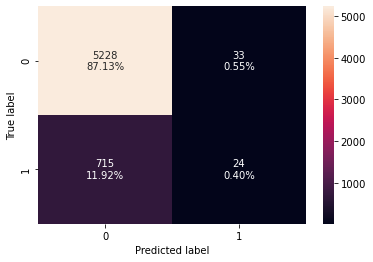

<IPython.core.display.Javascript object>

In [673]:
confusion_matrix_sklearn(estimator, X_test, y_test)


In [674]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.87533,0.03248,0.42105,0.06030


<IPython.core.display.Javascript object>

In [675]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.00000,0.87764
Recall,1.00000,0.06373
Precision,1.00000,0.68072
F1,1.00000,0.11655


<IPython.core.display.Javascript object>

In [676]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.93967,0.87533
Recall,0.80244,0.03248
Precision,0.73300,0.42105
F1,0.76615,0.06030


<IPython.core.display.Javascript object>

- Overall, the Decision tree performs better on the dataset
   

## Recommendations and Observations

We built a predictive model:

    a) that a bank can use to identify customers who might respond with interest in taking a loan.

    b) that a bank can use to find some key factors that could impact on a customer taking a loan or not.

Factors that seem to have an impact on Target: Occupation, Credit Transactions, SLR.

 - Those who are self-employed have a higher chance of taking out loans than those of other occupations.
 - The number of credit transactions indicates more spending (on credit) which also could show a higher chance of taking out loans.
 - Marketability to customers indiciates a higher chance of customers buying loans so improving this department should be able to increase the number of customers that will buy a loan

Overall, bank should improve marketing strategies and target those who are self employed and/or have more credit transactions in order to improve chances of buying loans.